# COVID-19 in Academia

# Preparation

In [ ]:
# install lucem_illud
!pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

In [5]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
from gensim.models import ldaseqmodel
import requests #For downloading our datasets
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import sklearn.cluster

import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [18]:
# import extra
import gensim
from textblob import TextBlob
import scipy

In [7]:
# get papers
temp_df = pandas.read_csv("/content/Papers_final.csv")
# delele NA years
papers_df = temp_df.dropna(axis=0, how='any', subset=["year"])
# change year to int
papers_df["year"].astype(int)

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
1954    2019
1955    2019
1956    2019
1957    2019
1958    2019
Name: year, Length: 1959, dtype: int64

In [8]:
# get econ data
from collections import defaultdict
from pathlib import Path

my_dir_path = "/content/econ"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
econ_df = pandas.DataFrame(results)
econ_df

,file_name,text
0,019023-Polarization and Public Health- Partisa...,Polarization and Public Health: Partisan Diffe...
1,019059-Global Supply Chains in the Pandemic.txt,Global Supply Chains in the Pandemic*\nBarthél...
2,019037-ECONOMIC UNCERTAINTY BEFORE AND DURING ...,NBER WORKING PAPER SERIES\nECONOMIC UNCERTAINT...
3,019035-The Impact of COVID-19 on Student Exper...,NBER WORKING PAPER SERIES\n\nTHE IMPACT OF COV...
4,019051-How Did COVID-19 and Stabilization Poli...,NBER WORKING PAPER SERIES\nHOW DID COVID-19 AN...
5,"019034-Fatalism, Beliefs, And Behaviors During...","NBER WORKING PAPER SERIES\n\nFATALISM, BELIEFS..."
6,019031-Aggregate and Firm-Level Stock Returns ...,NBER WORKING PAPER SERIES\n\nAGGREGATE AND FIR...
7,019025-The Macroeconomics of Epidemics.txt,NBER WORKING PAPER SERIES\n\nTHE MACROECONOMIC...
8,019043-Early Evidence on the Impact of COVID-1...,NBER WORKING PAPER SERIES\n\nEARLY EVIDENCE ON...
9,019032-An Seir Infectious Disease Model With T...,NBER WORKING PAPER SERIES\n\nAN SEIR INFECTIOU...


In [9]:
# get psych data
from collections import defaultdict
from pathlib import Path

my_dir_path = "/content/psych"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
psych_df = pandas.DataFrame(results)
psych_df

,file_name,text
0,Changes to the Work–Family Interface During th...,Journal of Applied Psychology\n© 2020 American...
1,Economic Stressors and the Enactment of CDC-Re...,Journal of Applied Psychology\n© 2020 American...
2,Working in a Pandemic.txt,Journal of Applied Psychology\n© 2020 American...
3,Anxiety Responses to the Unfolding COVID-19 Cr...,Journal of Applied Psychology\n© 2020 American...
4,When There is a Will There is a Way.txt,Journal of Applied Psychology\nWhen There is a...
5,"The Mind, the Heart, and the Leader in Times o...",Journal of Applied Psychology\n© 2020 American...
6,Supporting Interdependent Telework Employees.txt,Journal of Applied Psychology\n© 2020 American...
7,How Critical Activities Within COVID-19 Intens...,Journal of Applied Psychology\n© 2020 American...
8,Tackling the Negative Impact of COVID-19 on Wo...,Journal of Applied Psychology\nTackling the Ne...
9,Socioeconomic Status and Well-Being During COV...,Journal of Applied Psychology\n© 2020 American...


In [10]:
# combine econ and psych
full_df = pandas.concat([econ_df,psych_df])
full_df

,file_name,text
0,019023-Polarization and Public Health- Partisa...,Polarization and Public Health: Partisan Diffe...
1,019059-Global Supply Chains in the Pandemic.txt,Global Supply Chains in the Pandemic*\nBarthél...
2,019037-ECONOMIC UNCERTAINTY BEFORE AND DURING ...,NBER WORKING PAPER SERIES\nECONOMIC UNCERTAINT...
3,019035-The Impact of COVID-19 on Student Exper...,NBER WORKING PAPER SERIES\n\nTHE IMPACT OF COV...
4,019051-How Did COVID-19 and Stabilization Poli...,NBER WORKING PAPER SERIES\nHOW DID COVID-19 AN...
...,...,...
12,When Helping Hurts COVID-19 Critical Incident ...,Journal of Applied Psychology\n© 2020 American...
13,Impact of the COVID-19 Pandemic on Job Search ...,Journal of Applied Psychology\n© 2020 American...
14,"Plug Back Into Work, Safely Job Reattachment, ...",Journal of Applied Psychology\n© 2020 American...
15,Women’s Leadership Is Associated With Fewer De...,Journal of Applied Psychology\n© 2020 American...


In [11]:
# tokenization
full_df['tokenized_sents'] = full_df['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
# lemma
full_df['normalized_sents'] = full_df['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=True) for s in x])

full_df['tokenized_text'] = full_df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
full_df['normalized_tokens'] = full_df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [ ]:
full_df

In [ ]:
# tokenization
papers_df['tokenized_sents'] = papers_df['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
# lemma
papers_df['normalized_sents'] = papers_df['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=True) for s in x])

papers_df['tokenized_text'] = papers_df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
papers_df['normalized_tokens'] = papers_df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [ ]:
papers_df

# KL Divergence


In [13]:
# remove overlap
fullWords = set(full_df['normalized_tokens'].sum())
papersWords = set(papers_df['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = fullWords & papersWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['work']

666

In [15]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

In [16]:
fullProbArray = makeProbsArray(full_df['normalized_tokens'], overlapWordsDict)
papersProbArray = makeProbsArray(papers_df['normalized_tokens'], overlapWordsDict)
papersProbArray.sum()

1.0

In [24]:
# KL convergence
social_naturalDivergence = scipy.stats.entropy(fullProbArray, papersProbArray)
print (social_naturalDivergence)
natural_socialDivergence = scipy.stats.entropy(papersProbArray, fullProbArray)
print (natural_socialDivergence)

1.0003624288133506
1.0638245866284137


# Word2Vec

## Social Science

In [13]:
fullW2V = gensim.models.word2vec.Word2Vec(full_df['normalized_sents'].sum())

In [70]:
fullW2V.most_similar('president')

[('november', 0.9819780588150024),
 ('september', 0.9787055253982544),
 ('arkansas', 0.9778821468353271),
 ('la', 0.976869523525238),
 ('october', 0.9767385125160217),
 ('hawaii', 0.9765076637268066),
 ('24th', 0.9749261140823364),
 ('louisiana', 0.9748409986495972),
 ('gretchen', 0.9747686386108398),
 ('carolina', 0.9740902185440063)]

In [14]:
fullW2V.most_similar('covid-19')

[('outbreak', 0.849372386932373),
 ('influenza', 0.8349153995513916),
 ('pandemic', 0.8320005536079407),
 ('corona', 0.8232523202896118),
 ('covid19', 0.8178908824920654),
 ('spanish', 0.811830997467041),
 ('coronavirus', 0.8107658624649048),
 ('response', 0.80597984790802),
 ('novel', 0.8049942255020142),
 ('covid', 0.800186038017273)]

In [15]:
fullW2V.most_similar('vaccine')

[('infectiousness', 0.9439640045166016),
 ('effective', 0.9404677152633667),
 ('cure', 0.9244608283042908),
 ('know', 0.9193854331970215),
 ('extreme', 0.9165095686912537),
 ('quarantine', 0.9129801392555237),
 ('isolation', 0.9125193357467651),
 ('trace', 0.9110430479049683),
 ('lockdowns', 0.9108986258506775),
 ('contract', 0.9098805785179138)]

In [16]:
fullW2V.most_similar('treatment')

[('belief', 0.9609736800193787),
 ('vary', 0.9371767640113831),
 ('differential', 0.9222626686096191),
 ('interpret', 0.9134619235992432),
 ('additional', 0.9041493535041809),
 ('differ', 0.9014716148376465),
 ('overall', 0.8998055458068848),
 ('scenario', 0.8960479497909546),
 ('hold', 0.8951650857925415),
 ('trajectory', 0.8904632329940796)]

In [17]:
fullW2V.most_similar('china')

[('epicenter', 0.9148597717285156),
 ('2019-ncov', 0.9146484136581421),
 ('italy', 0.9090564250946045),
 ('outbreak', 0.908423900604248),
 ('coivd-19', 0.8972347974777222),
 ('corona', 0.8589129447937012),
 ('wuhan', 0.8528329730033875),
 ('worldwide', 0.8503612279891968),
 ('coronavirus', 0.8499854803085327),
 ('novel', 0.8499071002006531)]

In [18]:
fullW2V.most_similar('america')

[('warn', 0.9778646230697632),
 ('september', 0.9714869856834412),
 ('japan', 0.9712555408477783),
 ('france', 0.9693090915679932),
 ('germany', 0.9680418372154236),
 ('oklahoma', 0.9666305780410767),
 ('6', 0.9656875133514404),
 ('president', 0.9641669988632202),
 ('alabama', 0.9641361236572266),
 ('russia', 0.9635642766952515)]

In [22]:
fullW2V.most_similar('state')

[('kingdom', 0.8280285596847534),
 ('unite', 0.7875370979309082),
 ('county', 0.7582467794418335),
 ('reopen', 0.7544432878494263),
 ('governor', 0.7512765526771545),
 ('steady', 0.748540997505188),
 ('nation', 0.7378343343734741),
 ('country', 0.7249220013618469),
 ('declaration', 0.7214992046356201),
 ('resuscitation', 0.7055197954177856)]

In [23]:
fullW2V.most_similar('people')

[('require', 0.8840236067771912),
 ('individual', 0.8774884939193726),
 ('avoid', 0.8753497004508972),
 ('get', 0.8668035864830017),
 ('isolate', 0.8601580858230591),
 ('infect', 0.8601499795913696),
 ('meet', 0.8599317073822021),
 ('sick', 0.8542327284812927),
 ('know', 0.8538702130317688),
 ('asymptomatic', 0.8528835773468018)]

In [24]:
fullW2V.most_similar('worker')

[('child', 0.9048381447792053),
 ('member', 0.8561595678329468),
 ('employ', 0.8439839482307434),
 ('household', 0.8243786692619324),
 ('live', 0.8202165365219116),
 ('likely', 0.8187476396560669),
 ('essential', 0.7989829778671265),
 ('sale', 0.7958325743675232),
 ('couple', 0.7945008277893066),
 ('lose', 0.7865341901779175)]

In [71]:
fullW2V.most_similar('job')

[('performance', 0.7767320871353149),
 ('perform', 0.7687323093414307),
 ('task', 0.7589665055274963),
 ('student', 0.7334562540054321),
 ('experience', 0.7280638217926025),
 ('insecurity', 0.7277714014053345),
 ('couple', 0.7221989631652832),
 ('woman', 0.7134095430374146),
 ('skill', 0.7128334045410156),
 ('workplace', 0.7101960778236389)]

In [25]:
fullW2V.most_similar('leader')

[('commitment', 0.9728037714958191),
 ('indirectly', 0.9477722644805908),
 ('knowledge', 0.944723904132843),
 ('safety', 0.9422106742858887),
 ('contribute', 0.9403423070907593),
 ('exacerbate', 0.9397084712982178),
 ('progress', 0.9394020438194275),
 ('goal', 0.9372594356536865),
 ('regulation', 0.9357172846794128),
 ('potential', 0.9339116811752319)]

In [28]:
fullW2V.most_similar('psychological')

[('association', 0.9376375079154968),
 ('document', 0.9167454838752747),
 ('american', 0.8909935355186462),
 ('ally', 0.8893635272979736),
 ('psychologist', 0.8778862953186035),
 ('fulfillment', 0.8642103672027588),
 ('copyright', 0.8618373870849609),
 ('publisher', 0.8573639392852783),
 ('perspective', 0.8492352962493896),
 ('513–524', 0.8421583771705627)]

In [27]:
fullW2V.most_similar('economy')

[('shock', 0.9052436351776123),
 ('chain', 0.898902177810669),
 ('pharmaceutical', 0.8619531393051147),
 ('mitigate', 0.8553270101547241),
 ('externality', 0.8548004627227783),
 ('equilibrium', 0.8537750244140625),
 ('temporary', 0.8504856824874878),
 ('trade', 0.8500582575798035),
 ('consequence', 0.8491602540016174),
 ('affect', 0.8470218777656555)]

In [32]:
numWords = 50
targetWords = fullW2V.wv.index2word[:numWords]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(fullW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.5597746 ,  0.11376412, -0.46149015, ..., -1.0161502 ,
        -0.15520696,  1.9305593 ],
       [ 1.5558631 ,  0.6378739 , -0.28709278, ...,  0.01625011,
        -0.33888507, -0.41665804],
       [ 0.13115358, -0.79369175, -0.08601692, ...,  0.47851998,
         1.3679327 ,  0.29697704],
       ...,
       [ 1.0241284 ,  0.59538925, -0.52049774, ..., -0.9568455 ,
         0.6599825 ,  1.6414175 ],
       [ 0.8711913 ,  0.400333  , -0.61866343, ..., -0.33490178,
         1.0486008 , -0.33106804],
       [ 0.82725126, -0.5059644 , -0.27818385, ...,  0.06999511,
         0.33809572, -0.779389  ]], dtype=float32)

In [35]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
# TSNE
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 11005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 11005 missing from current font.
  font.set_text(s, 0, flags=flags)


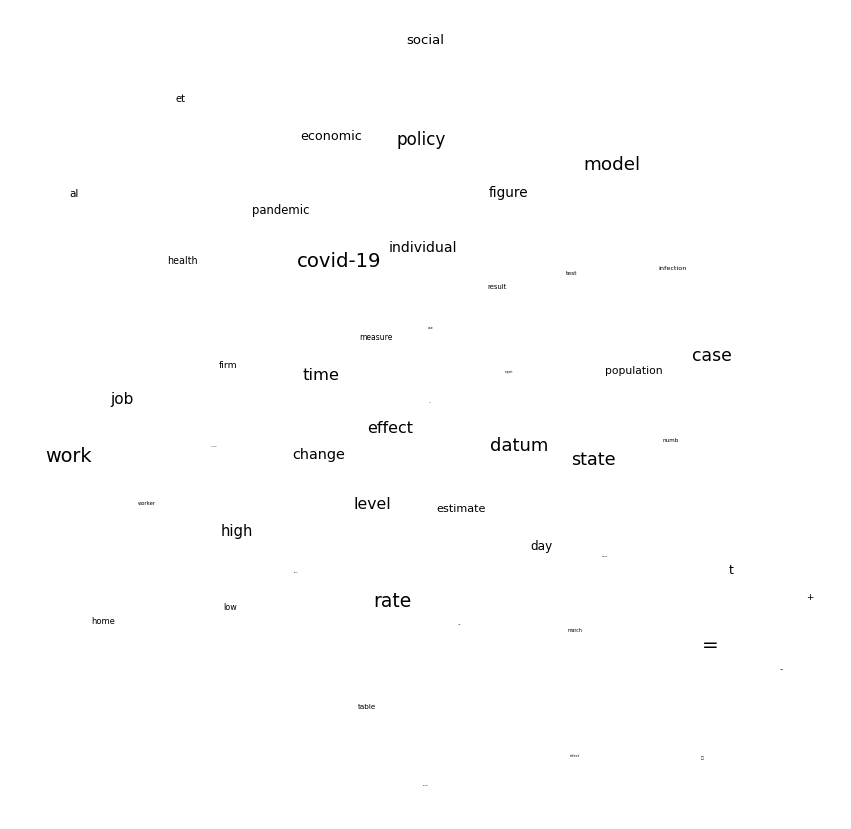

In [36]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

## Natural Science

In [15]:
papersW2V = gensim.models.word2vec.Word2Vec(papers_df['normalized_sents'].sum())

In [17]:
papersW2V.most_similar('covid-19')

[('new', 0.9998427629470825),
 ('result', 0.9998418092727661),
 ('continue', 0.9998132586479187),
 ('human', 0.9997997879981995),
 ('recently', 0.9997830390930176),
 ('complication', 0.9997658729553223),
 ('late', 0.9997572898864746),
 ('infectious', 0.9997531771659851),
 ('worldwide', 0.9997470378875732),
 ('begin', 0.9997299313545227)]

In [21]:
papersW2V.most_similar('vaccine')

[('model', 0.9998939037322998),
 ('effective', 0.9998881816864014),
 ('potential', 0.9998874664306641),
 ('strategy', 0.999883234500885),
 ('include', 0.9998825788497925),
 ('drug', 0.9998806715011597),
 ('understand', 0.9998775720596313),
 ('early', 0.9998756647109985),
 ('reduce', 0.9998752474784851),
 ('control', 0.9998699426651001)]

In [22]:
papersW2V.most_similar('treatment')

[('low', 0.9998729228973389),
 ('relate', 0.9998582601547241),
 ('understand', 0.9998553395271301),
 ('vaccine', 0.9998540878295898),
 ('patient', 0.9998528957366943),
 ('present', 0.999847412109375),
 ('severity', 0.9998459815979004),
 ('find', 0.9998447895050049),
 ('trial', 0.9998437166213989),
 ('march', 0.9998431205749512)]

In [24]:
papersW2V.most_similar('china')

[('hubei', 0.999714195728302),
 ('late', 0.9992879629135132),
 ('rapidly', 0.9992682933807373),
 ('worldwide', 0.9992018938064575),
 ('originate', 0.999173641204834),
 ('begin', 0.9990863800048828),
 ('province', 0.9990449547767639),
 ('viral', 0.9990167617797852),
 ('recently', 0.9990154504776001),
 ('new', 0.9989810585975647)]

In [25]:
papersW2V.most_similar('job')

[('disorder', 0.9986975193023682),
 ('et', 0.9986754655838013),
 ('implement', 0.9986667633056641),
 ('search', 0.9986576437950134),
 ('numb', 0.9986507892608643),
 ('adopt', 0.9986448287963867),
 ('use', 0.9986392259597778),
 ('ct', 0.998621940612793),
 ('role', 0.9986189603805542),
 ('investigate', 0.9986182451248169)]

In [26]:
papersW2V.most_similar('leader')

[('level', 0.9997876286506653),
 ('time', 0.9997591972351074),
 ('university', 0.9997567534446716),
 ('government', 0.9997553825378418),
 ('work', 0.9997516870498657),
 ('group', 0.9997513294219971),
 ('learn', 0.9997508525848389),
 ('community', 0.9997485876083374),
 ('lockdown', 0.9997460246086121),
 ('policy', 0.9997444152832031)]

In [27]:
papersW2V.most_similar('economy')

[('impact', 0.9998507499694824),
 ('crisis', 0.9998484253883362),
 ('society', 0.9998253583908081),
 ('work', 0.9998248815536499),
 ('hospital', 0.999822199344635),
 ('lockdown', 0.9998174905776978),
 ('practice', 0.9998120665550232),
 ('university', 0.9998114109039307),
 ('time', 0.9998106956481934),
 ('service', 0.9998049736022949)]

In [28]:
papersW2V.most_similar('people')

[('include', 0.9999063611030579),
 ('increase', 0.9998904466629028),
 ('large', 0.9998719692230225),
 ('early', 0.9998691082000732),
 ('understand', 0.9998657703399658),
 ('adult', 0.9998646974563599),
 ('potential', 0.9998599290847778),
 ('effective', 0.9998580813407898),
 ('strategy', 0.9998574256896973),
 ('model', 0.9998565912246704)]

In [18]:
numWords = 50
targetWords = papersW2V.wv.index2word[:numWords]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(papersW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.14979531,  0.2669175 ,  0.12955476, ...,  0.11501095,
         0.14630908,  0.29235613],
       [-0.24249135,  0.20138872,  0.18974334, ..., -0.08300783,
         0.2026029 ,  0.1714743 ],
       [-0.1907625 ,  0.21985237,  0.1683869 , ...,  0.01276754,
         0.17862743,  0.22623345],
       ...,
       [-0.12222155,  0.28314623,  0.11710867, ...,  0.15160415,
         0.13312975,  0.31924036],
       [-0.15002699,  0.30869752,  0.12305681, ...,  0.17250948,
         0.13895474,  0.34231085],
       [-0.13575284,  0.27041823,  0.11949792, ...,  0.145287  ,
         0.13111664,  0.3129912 ]], dtype=float32)

In [19]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
# TSNE
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

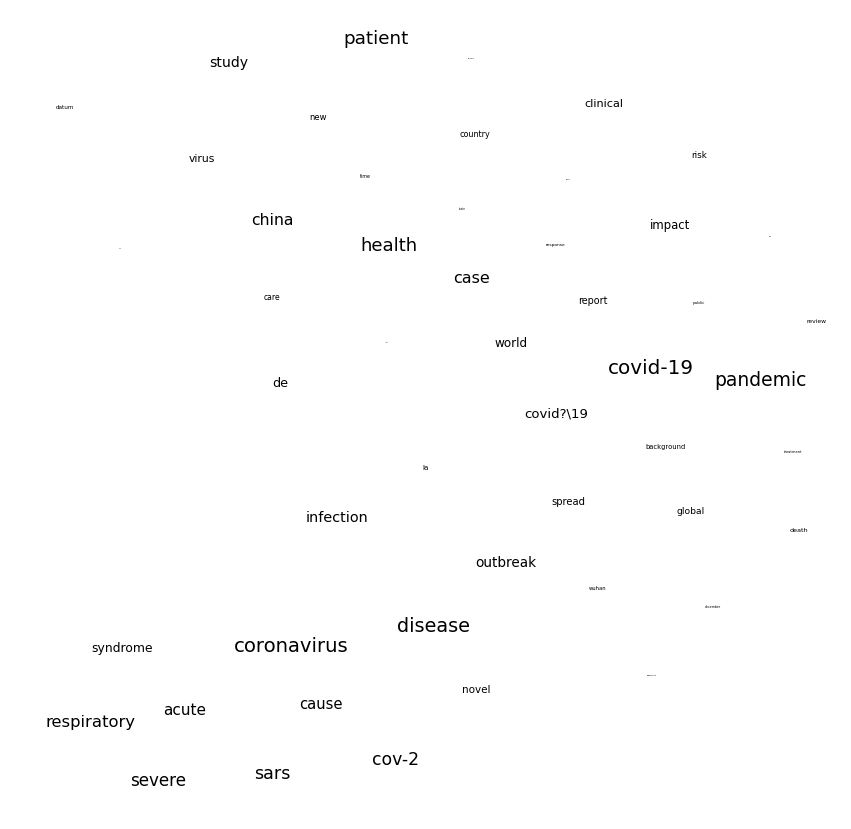

In [29]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

# Linguistic Change

In [30]:
import copy

In [31]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [33]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [35]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [39]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

In [43]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [36]:
rawEmbeddings, comparedEmbeddings = compareModels(papers_df, 'year')

In [44]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 265 words to compare


In [45]:
# most divergent
wordDivergences[:20]

[('question', 0.9772264361381531),
 ('america', 0.8928688168525696),
 ('real', 0.8140999674797058),
 ('period', 0.8040522336959839),
 ('model', 0.7849266529083252),
 ('introduction', 0.7819625735282898),
 ('well', 0.7156000733375549),
 ('era', 0.6698452234268188),
 ('threat', 0.6512431502342224),
 ('link', 0.6267843842506409),
 ('non', 0.6138435006141663),
 ('search', 0.5444912910461426),
 ('document', 0.5067097544670105),
 ('help', 0.4897412657737732),
 ('assessment', 0.4890210032463074),
 ('intensive', 0.48097503185272217),
 ('aspect', 0.4807313084602356),
 ('hospitalize', 0.47300034761428833),
 ('lung', 0.4536757469177246),
 ('therapy', 0.44734495878219604)]

In [46]:
wordDivergences[-20:]

[('disease', 0.022487878799438477),
 ('syndrome', 0.02231299877166748),
 ('practice', 0.021638453006744385),
 ('medical', 0.021146655082702637),
 ('student', 0.02090078592300415),
 ('acute', 0.020557105541229248),
 ('care', 0.02038121223449707),
 ('state', 0.019770681858062744),
 ('sars', 0.019412517547607422),
 ('cause', 0.019277334213256836),
 ('country', 0.019088447093963623),
 ('system', 0.018129825592041016),
 ('new', 0.01715749502182007),
 ('world', 0.017048776149749756),
 ('case', 0.015927553176879883),
 ('health', 0.01433563232421875),
 ('severe', 0.01371544599533081),
 ('coronavirus', 0.011662721633911133),
 ('pandemic', 0.010997951030731201),
 ('covid-19', 0.003960847854614258)]

china


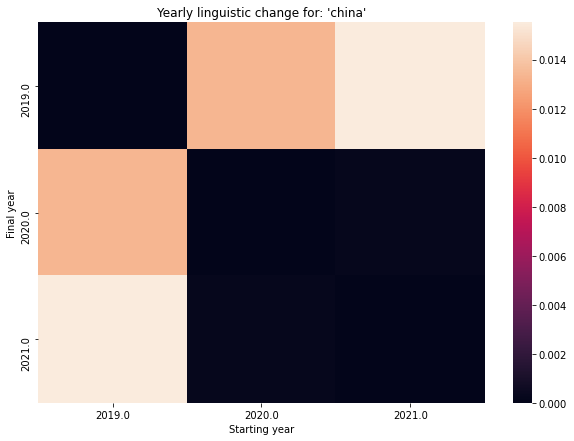

In [40]:
targetWord = 'china'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

america


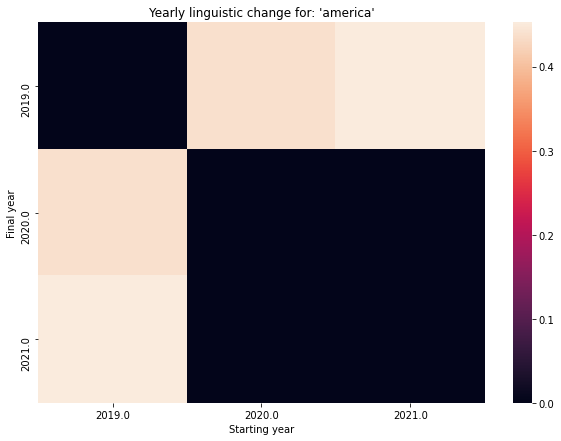

In [47]:
targetWord= "america"
pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

quarantine


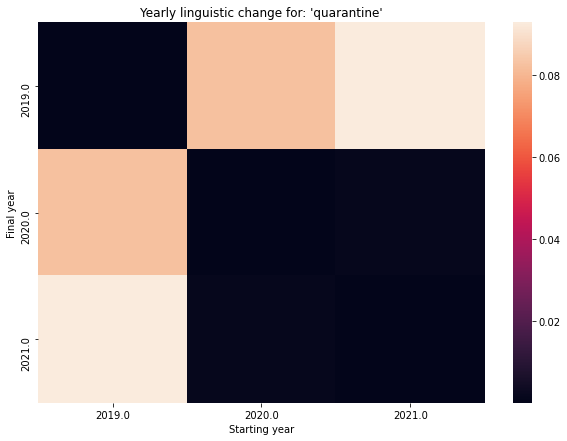

In [48]:
targetWord= "quarantine"
pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

vaccine


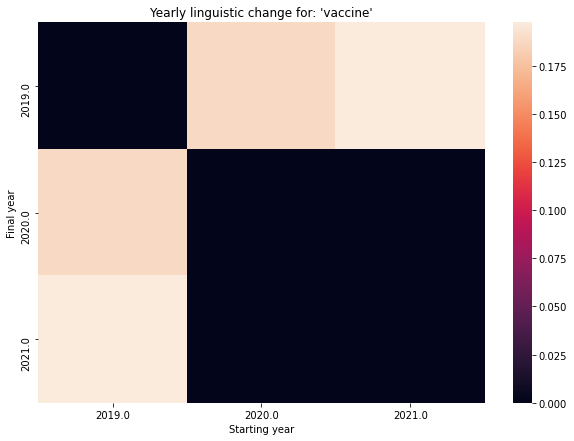

In [49]:
targetWord= "vaccine"
pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

threat


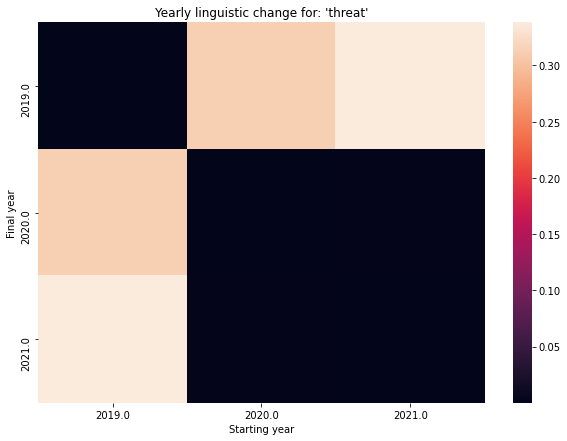

In [51]:
targetWord = 'threat'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

# Sentiment Analysis

In [60]:
# sentiment
full_content= ("".join(i for i in full_df['text']))
full_sentiment = TextBlob(full_content)

In [63]:
econ_content= ("".join(i for i in econ_df['text']))
econ_sentiment = TextBlob(econ_content)
econ_sentiment.sentiment

Sentiment(polarity=0.0728681077814532, subjectivity=0.3848585802602516)

In [65]:
psych_content= ("".join(i for i in psych_df['text']))
psych_sentiment = TextBlob(psych_content)
psych_sentiment.sentiment

Sentiment(polarity=0.07493156434782125, subjectivity=0.3916037609531709)

In [67]:
papers_content= ("".join(i for i in papers_df['text']))
papers_sentiment = TextBlob(papers_content)
papers_sentiment.sentiment

Sentiment(polarity=0.10677599837734063, subjectivity=0.4166789151770683)

In [62]:
full_sentiment.sentiment

Sentiment(polarity=0.07335415371042517, subjectivity=0.38644740343657424)

# K-means

## Social Science

In [12]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

In [11]:
#initialize
full_Vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.8, min_df=5, max_features=1000, stop_words='english', norm='l2')
#train
full_vects = full_Vectorizer.fit_transform(full_df['text'])
full_vects.shape

(72, 1000)

In [23]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(papers_vects.toarray())
reduced_data = pca.transform(full_vects.toarray())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


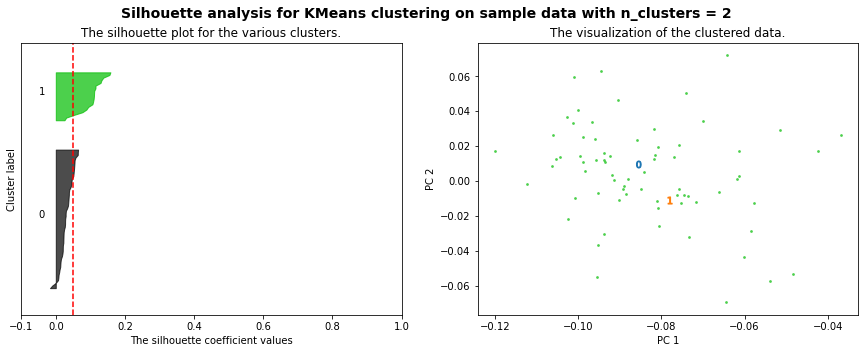

For n_clusters = 2, The average silhouette_score is : 0.049


In [19]:
# try 2 clusters
X = full_vects.toarray()
plotSilhouette(2, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


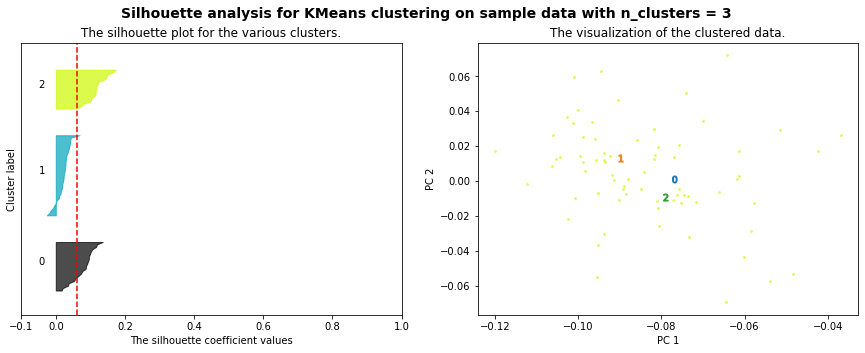

For n_clusters = 3, The average silhouette_score is : 0.061


In [22]:
# try 2 clusters
X = full_vects.toarray()
plotSilhouette(3, X)

In [24]:
full_km = sklearn.cluster.KMeans(2, init='k-means++')
full_km.fit(full_vects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
full_terms = full_Vectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = full_km.cluster_centers_.argsort()[:, ::-1]
for i in range(2):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % full_terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 doi
 dx
 job
 psychological
 anxiety
 psychology
 employees
 1037
 01
 engagement


Cluster 1:
 infected
 home
 policy
 employment
 county
 percent
 unemployment
 infection
 panel
 labor




## Natural Science

In [32]:
#initialize
papers_Vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.8, min_df=5, max_features=1000, stop_words='english', norm='l2')
#train
papers_vects = papers_Vectorizer.fit_transform(papers_df['text'])
papers_vects.shape

(1959, 1000)

In [33]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(papers_vects.toarray())
reduced_data = pca.transform(papers_vects.toarray())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


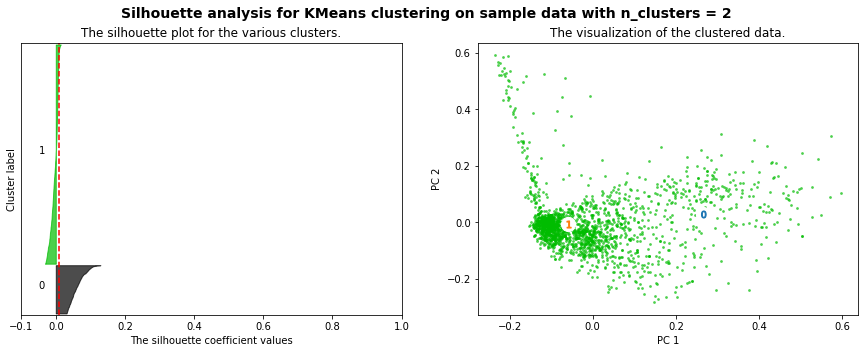

For n_clusters = 2, The average silhouette_score is : 0.008


In [34]:
# try 2 clusters
X = papers_vects.toarray()
plotSilhouette(2, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


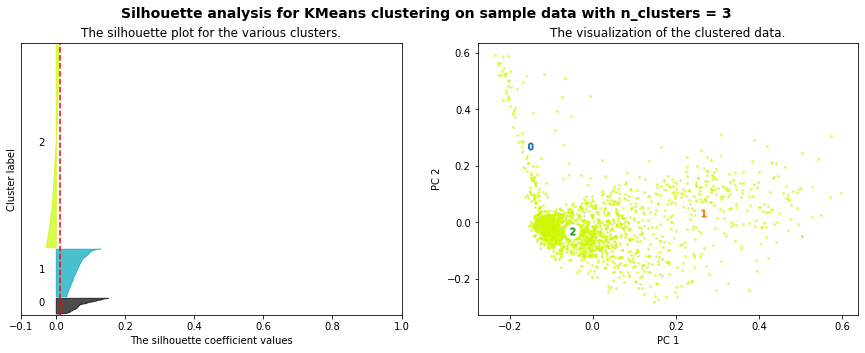

For n_clusters = 3, The average silhouette_score is : 0.013


In [35]:
# try 2 clusters
X = papers_vects.toarray()
plotSilhouette(3, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


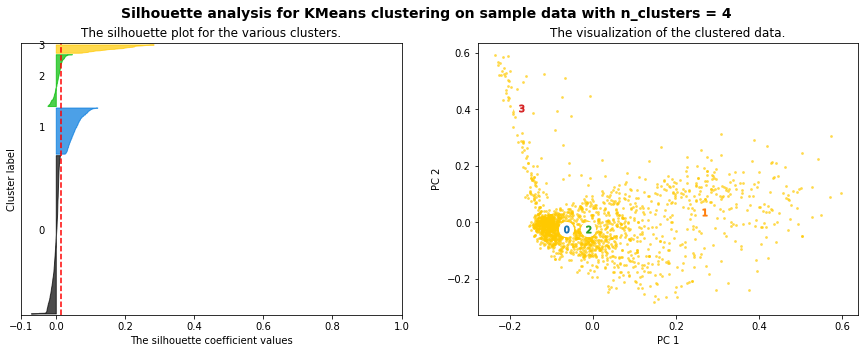

For n_clusters = 4, The average silhouette_score is : 0.015


In [36]:
# try 2 clusters
X = papers_vects.toarray()
plotSilhouette(4, X)

In [44]:
papers_km = sklearn.cluster.KMeans(2, init='k-means++')
papers_km.fit(papers_vects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
papers_terms = papers_Vectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = papers_km.cluster_centers_.argsort()[:, ::-1]
for i in range(2):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % papers_terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 pandemic
 disease
 patients
 coronavirus
 health
 2019
 2020
 study
 world
 clinical


Cluster 1:
 coronavirus
 respiratory
 sars
 cov
 2019
 acute
 severe
 syndrome
 disease
 caused




In [41]:
papers_km = sklearn.cluster.KMeans(3, init='k-means++')
papers_km.fit(papers_vects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
papers_terms = papers_Vectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = papers_km.cluster_centers_.argsort()[:, ::-1]
for i in range(3):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % papers_terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 la
 di
 en
 da
 el
 del
 pandemia
 por
 na
 para


Cluster 1:
 coronavirus
 respiratory
 sars
 cov
 acute
 severe
 syndrome
 2019
 disease
 caused


Cluster 2:
 pandemic
 disease
 patients
 coronavirus
 health
 2019
 2020
 study
 world
 clinical




# Topic Modeling

## Social Science

In [46]:
dictionary_full = gensim.corpora.Dictionary(full_df['normalized_tokens'])

In [47]:
corpus_full = [dictionary_full.doc2bow(text) for text in full_df['normalized_tokens']]

In [57]:
lda_full = gensim.models.ldamodel.LdaModel(corpus=corpus_full, id2word=dictionary_full, num_topics=5, alpha='auto', eta='auto')

In [58]:
topicsDict = {}
for topicNum in range(lda_full.num_topics):
    topicWords = [w for w, p in lda_full.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,rate,covid-19,=,=,covid-19
1,=,=,work,work,work
2,work,rate,covid-19,covid-19,model
3,−,policy,state,rate,=
4,t,work,model,datum,rate
5,model,datum,time,job,time
6,datum,model,datum,state,datum
7,covid-19,case,change,case,level
8,state,firm,case,time,effect
9,policy,effect,effect,figure,individual


## Natural Science

In [52]:
dictionary_papers = gensim.corpora.Dictionary(papers_df['normalized_tokens'])

In [53]:
corpus_papers = [dictionary_papers.doc2bow(text) for text in papers_df['normalized_tokens']]

In [56]:
lda_papers = gensim.models.ldamodel.LdaModel(corpus=corpus_papers, id2word=dictionary_papers, num_topics=5, alpha='auto', eta='auto')

In [59]:
topicsDict = {}
for topicNum in range(lda_papers.num_topics):
    topicWords = [w for w, p in lda_papers.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,covid-19,de,covid-19,covid-19,covid-19
1,pandemic,la,disease,coronavirus,coronavirus
2,coronavirus,covid-19,coronavirus,disease,disease
3,case,coronavirus,pandemic,pandemic,sars
4,disease,covid?\19,patient,health,patient
5,health,sars,severe,patient,cause
6,outbreak,outbreak,health,infection,respiratory
7,covid?\19,en,sars,china,cov-2
8,global,le,respiratory,outbreak,china
9,cov-2,cov-2,acute,severe,pandemic


# Dynamic Topic Modeling

In [65]:
from gensim.corpora import Dictionary, bleicorpus
from gensim.matutils import hellinger

In [61]:
time_slice = [640, 836, 483]

In [67]:
dictionary_seq = gensim.corpora.Dictionary(papers_df['normalized_tokens'])
#dictionary = gensim.corpora.Dictionary(final_corpus)
corpus_seq = [dictionary_seq.doc2bow(text) for text in papers_df['normalized_tokens']]
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus_seq, id2word=dictionary_seq, time_slice=time_slice, num_topics=2)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldaseqmodel.py:290: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


In [68]:
ldaseq.print_topics(time=0)

[[('covid-19', 0.046723443618186804),
  ('pandemic', 0.01666185694081015),
  ('de', 0.013147735282885771),
  ('la', 0.00805385891530807),
  ('impact', 0.0064823056876690205),
  ('crisis', 0.004873021391956587),
  ('e', 0.004615595950721479),
  ('global', 0.004246331244818657),
  ('health', 0.004170162839912912),
  ('social', 0.003980834727989875),
  ('en', 0.003974607484036784),
  ('di', 0.0038445581715665614),
  ('time', 0.0034011534113324473),
  ('article', 0.0033993178606789775),
  ('economic', 0.0033862981987582675),
  ('covid', 0.0033821781033152687),
  ('world', 0.0032863856979313067),
  ('medical', 0.003206116218973925),
  ('new', 0.0030615651854937033),
  ('learn', 0.003056385709554595)],
 [('covid-19', 0.06346346053327592),
  ('coronavirus', 0.02673126389515641),
  ('disease', 0.02401511538115626),
  ('patient', 0.01330413138984548),
  ('pandemic', 0.012128038912016657),
  ('sars', 0.010308268450830911),
  ('health', 0.00986025848576333),
  ('severe', 0.009223478843966168),
  

In [69]:
ldaseq.print_topics(time=1)

[[('covid-19', 0.04660667569843402),
  ('pandemic', 0.01656140913626898),
  ('de', 0.014408436877613584),
  ('la', 0.008500917267636205),
  ('impact', 0.006297414325254963),
  ('crisis', 0.0048143407065999655),
  ('e', 0.004764436467061105),
  ('global', 0.004163796548585984),
  ('health', 0.004120430568105463),
  ('en', 0.004090482350693483),
  ('di', 0.003984883267667977),
  ('social', 0.003921407729428352),
  ('article', 0.0034478729289488847),
  ('covid', 0.0034288331732737556),
  ('economic', 0.0033368208656752627),
  ('time', 0.003329696401301124),
  ('medical', 0.003277169388507299),
  ('world', 0.003260283503466654),
  ('new', 0.003042821886329991),
  ('learn', 0.0030156952330389125)],
 [('covid-19', 0.0638124287465592),
  ('coronavirus', 0.026969213165491154),
  ('disease', 0.024146529032677923),
  ('patient', 0.013237142599127186),
  ('pandemic', 0.01224390454015414),
  ('sars', 0.01039322933544439),
  ('health', 0.01033173903961803),
  ('severe', 0.009510829427422055),
  ('r

In [70]:
ldaseq.print_topics(time=2)

[[('covid-19', 0.046322261608395095),
  ('pandemic', 0.016420132572796182),
  ('de', 0.01636708598028615),
  ('la', 0.009145930256156301),
  ('impact', 0.006030995432705853),
  ('e', 0.004992934877059675),
  ('crisis', 0.004726211224326175),
  ('en', 0.004254720878231465),
  ('di', 0.004182274110766479),
  ('health', 0.003995426408708622),
  ('global', 0.003981191806455716),
  ('social', 0.003860794888898123),
  ('covid', 0.00349350440310812),
  ('article', 0.0034025119263356796),
  ('time', 0.003223772288278957),
  ('economic', 0.0032192136361130076),
  ('world', 0.00321826324729171),
  ('medical', 0.003173588334713717),
  ('y', 0.0031304526048208394),
  ('el', 0.0031206825589658238)],
 [('covid-19', 0.06428464962404917),
  ('coronavirus', 0.027254611441029808),
  ('disease', 0.02432902692950473),
  ('patient', 0.013227578385411444),
  ('pandemic', 0.012390558732265263),
  ('sars', 0.010489491673089726),
  ('health', 0.010097726048698887),
  ('respiratory', 0.009111447115459295),
  ('

In [71]:
ldaseq.print_topic_times(topic=0) # evolution of 1st topic

[[('covid-19', 0.046723443618186804),
  ('pandemic', 0.01666185694081015),
  ('de', 0.013147735282885771),
  ('la', 0.00805385891530807),
  ('impact', 0.0064823056876690205),
  ('crisis', 0.004873021391956587),
  ('e', 0.004615595950721479),
  ('global', 0.004246331244818657),
  ('health', 0.004170162839912912),
  ('social', 0.003980834727989875),
  ('en', 0.003974607484036784),
  ('di', 0.0038445581715665614),
  ('time', 0.0034011534113324473),
  ('article', 0.0033993178606789775),
  ('economic', 0.0033862981987582675),
  ('covid', 0.0033821781033152687),
  ('world', 0.0032863856979313067),
  ('medical', 0.003206116218973925),
  ('new', 0.0030615651854937033),
  ('learn', 0.003056385709554595)],
 [('covid-19', 0.04660667569843402),
  ('pandemic', 0.01656140913626898),
  ('de', 0.014408436877613584),
  ('la', 0.008500917267636205),
  ('impact', 0.006297414325254963),
  ('crisis', 0.0048143407065999655),
  ('e', 0.004764436467061105),
  ('global', 0.004163796548585984),
  ('health', 0.0

In [72]:
ldaseq.print_topic_times(topic=1) # evolution of 2nd topic

[[('covid-19', 0.06346346053327592),
  ('coronavirus', 0.02673126389515641),
  ('disease', 0.02401511538115626),
  ('patient', 0.01330413138984548),
  ('pandemic', 0.012128038912016657),
  ('sars', 0.010308268450830911),
  ('health', 0.00986025848576333),
  ('severe', 0.009223478843966168),
  ('respiratory', 0.008958171431812089),
  ('cov-2', 0.008903325532338982),
  ('case', 0.00882721770759777),
  ('acute', 0.008104757633943211),
  ('china', 0.007967753332214873),
  ('cause', 0.007711476302335946),
  ('infection', 0.007567542583296424),
  ('outbreak', 0.007113328763442282),
  ('covid?\\19', 0.006904749978605111),
  ('syndrome', 0.006592741782246652),
  ('study', 0.006369879843431602),
  ('clinical', 0.006069589891108472)],
 [('covid-19', 0.0638124287465592),
  ('coronavirus', 0.026969213165491154),
  ('disease', 0.024146529032677923),
  ('patient', 0.013237142599127186),
  ('pandemic', 0.01224390454015414),
  ('sars', 0.01039322933544439),
  ('health', 0.01033173903961803),
  ('sever

In [73]:
top_words_topic_0 = {}
for i, year in enumerate([2019, 2020, 2021]):
    word_lst = ldaseq.print_topics(time=i)[0]
    top_words_topic_0[year] = [word for word, prob in word_lst[:10]]

In [75]:
pandas.DataFrame(top_words_topic_0)

,2019,2020,2021
0,covid-19,covid-19,covid-19
1,pandemic,pandemic,pandemic
2,de,de,de
3,la,la,la
4,impact,impact,impact
5,crisis,crisis,e
6,e,e,crisis
7,global,global,en
8,health,health,di
9,social,en,health


In [76]:
top_words_topic_1 = {}
for i, year in enumerate([2019, 2020, 2021]):
    word_2st = ldaseq.print_topics(time=i)[1]
    top_words_topic_1[year] = [word for word, prob in word_2st[:10]]

In [77]:
pandas.DataFrame(top_words_topic_1)

,2019,2020,2021
0,covid-19,covid-19,covid-19
1,coronavirus,coronavirus,coronavirus
2,disease,disease,disease
3,patient,patient,patient
4,pandemic,pandemic,pandemic
5,sars,sars,sars
6,health,health,health
7,severe,severe,respiratory
8,respiratory,respiratory,cov-2
9,cov-2,cov-2,case
